In [1]:
import numpy as np

In [2]:
from numpy import linalg as LA

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import pandas as pd

In [6]:
from scipy import linalg

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
from sklearn import *

In [14]:
from matplotlib import pyplot

In [15]:
LDA_Asthma = pd.read_csv('ML_Asthma.csv')
sns_LDA_Asthma = LDA_Asthma[['FeNO','FEF2575_pre','REV_ml','BMI','GOLD_Dx']]

In [16]:
sns_LDA_Asthma.values.reshape

<function ndarray.reshape>

In [17]:
sns_LDA_Asthma
sns_LDA_Asthma = sns_LDA_Asthma*100
np.round(sns_LDA_Asthma, decimals=0, out=None)

FeNO  FEF2575_pre  REV_ml     BMI  GOLD_Dx
0    4100.0        150.0    14.0  1357.0        0
1    5600.0        220.0    26.0  1867.0      100
2     900.0        236.0     9.0  2009.0        0
3       0.0        185.0    -2.0  1518.0        0
4    1100.0        212.0     6.0  2110.0        0
5    1200.0        290.0    -4.0  1590.0        0
6     800.0        259.0     4.0  1874.0        0
7       0.0        162.0    38.0  2048.0      100
8    1300.0        190.0    23.0  2690.0      100
9    1100.0        182.0    16.0  1801.0        0
10   1100.0        188.0     5.0  1306.0        0
11   3700.0         95.0    23.0  1612.0      100
12   7700.0        237.0     6.0  2143.0        0
13   6700.0        185.0    12.0  1503.0      100
14   1600.0        207.0    12.0  1532.0        0
15   1500.0        187.0     2.0  1590.0        0
16    200.0        188.0     4.0  1322.0        0
17    400.0        260.0    -1.0  1913.0        0
18    800.0        163.0     4.0  1980.0        0
19   1000.0        212.0    -3.0  1720.0        0
20    900.0        211.0    10.0  1434.0        0
21    900.0        201.0     4.0  1624.0        0
22   1400.0        257.0    -2.0  2136.0        0
23   5100.0        185.0     6.0  1689.0        0
24    600.0        233.0     6.0  2352.0        0
25   2300.0        198.0    -2.0  1935.0        0
26   2000.0        188.0    11.0  2339.0        0
27   5100.0        178.0    42.0  2053.0      100
28   1600.0        273.0     6.0  2442.0        0
29   1300.0        227.0   141.0  2583.0        0
..      ...          ...     ...     ...      ...
587   600.0        142.0     8.0  1680.0        0
588   800.0        228.0    -7.0  2182.0        0
589  2100.0        165.0    10.0  1670.0        0
590   900.0        252.0     7.0  1674.0        0
591   500.0        192.0     9.0  1613.0        0
592  1500.0        316.0     9.0  1810.0        0
593   200.0        158.0    14.0  1405.0        0
594  1200.0        185.0    -1.0  1470.0        0
595  2000.0        375.0     2.0  1703.0        0
596  1000.0        383.0     7.0  2106.0        0
597   600.0        206.0     7.0  1562.0        0
598  1900.0        246.0    -6.0  1442.0        0
599   100.0        280.0     4.0  1597.0        0
600   900.0        281.0     0.0  1680.0        0
601  4700.0        260.0    15.0  1813.0        0
602   700.0        176.0    13.0  1410.0        0
603  2300.0        259.0     1.0  1780.0        0
604  1000.0        240.0     4.0  1404.0        0
605  2100.0        301.0     5.0  1833.0        0
606  1700.0        304.0    24.0  1693.0        0
607  1300.0         76.0    11.0  1570.0        0
608  2400.0        189.0     8.0  2260.0        0
609   300.0        211.0    21.0  1540.0        0
610  1100.0        243.0     8.0  1437.0        0
611   300.0        175.0    17.0  1900.0        0
612  2400.0        190.0     3.0  1508.0        0
613   500.0        204.0     7.0  1600.0        0
614  1000.0        264.0     4.0  1609.0        0
615   600.0        285.0    -2.0  1502.0        0
616  2300.0        246.0     9.0  2019.0        0

[617 rows x 5 columns]

In [18]:
# Database conversion:
X = sns_LDA_Asthma.iloc[:, :4].values

In [19]:
y = sns_LDA_Asthma.iloc[:, 4].values

In [20]:
X

array([[ 4.10000000e+03,  1.50000000e+02,  1.40000000e+01,
         1.35714286e+03],
       [ 5.60000000e+03,  2.20000000e+02,  2.60000000e+01,
         1.86714205e+03],
       [ 9.00000000e+02,  2.36000000e+02,  9.00000000e+00,
         2.00872360e+03],
       ...,
       [ 1.00000000e+03,  2.64000000e+02,  4.00000000e+00,
         1.60911991e+03],
       [ 6.00000000e+02,  2.85000000e+02, -2.00000000e+00,
         1.50222222e+03],
       [ 2.30000000e+03,  2.46000000e+02,  9.00000000e+00,
         2.01920439e+03]])

In [21]:
y

array([  0, 100,   0,   0,   0,   0,   0, 100, 100,   0,   0, 100,   0,
       100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 100,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,
         0,   0,   0, 100,   0,   0,   0, 100,   0,   0,   0,   0, 100,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0, 100,
       100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 100,   0, 100, 100,   0,   0,
         0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [22]:
# Split test and train samples:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [23]:
#Apply Feature Scaling:
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)

In [25]:
X_test = sc.transform(X_test)

In [26]:
X_train

array([[-0.39281475, -1.69302136,  1.37861522, -0.40122793],
       [-0.81015043, -0.89972399, -0.20219323,  0.29380793],
       [ 1.23015737, -0.71523623,  0.65595993, -1.05610551],
       ...,
       [ 1.13741611, -1.49008483, -0.11186132, -0.36970994],
       [-0.43918538,  1.40637304, -1.15067831, -0.50485129],
       [ 0.21000347,  0.18875381, -0.3376911 ,  0.1345779 ]])

In [27]:
#Apply LDA:
lda = LDA(n_components = 4)

In [28]:
X_train = lda.fit_transform(X_train, y_train)

In [29]:
X_test = lda.transform(X_test)

In [30]:
X_train

array([[ 1.44923309e+00],
       [-8.78529584e-02],
       [ 1.26074645e+00],
       [-8.61836002e-01],
       [ 2.23650380e+00],
       [ 1.14460568e+00],
       [-1.82968126e-01],
       [-1.01154336e+00],
       [-2.99758299e-01],
       [ 2.27772357e-01],
       [-7.27751322e-02],
       [-3.99863563e-01],
       [ 9.00223346e-02],
       [ 7.59056887e-01],
       [-3.21158494e-01],
       [-2.55512083e-02],
       [-1.27359352e+00],
       [ 9.95674751e-01],
       [-4.32838436e-01],
       [-3.58169015e-01],
       [-5.23614953e-01],
       [-1.08169078e+00],
       [ 5.59236078e-01],
       [-1.70191095e-01],
       [ 4.77482299e-01],
       [ 8.96288525e+00],
       [ 4.93637565e-02],
       [ 3.70170586e-01],
       [-5.18025796e-01],
       [ 5.46970464e-01],
       [-1.88669491e+00],
       [-3.27130941e-01],
       [ 4.07512202e-01],
       [ 1.75740179e-01],
       [ 7.25491288e-01],
       [-1.97535756e-01],
       [-3.54912237e-01],
       [-9.79968308e-01],
       [-6.4

In [31]:
X_test

array([[-0.22090274],
       [ 0.64303696],
       [-1.09530861],
       [-1.35654335],
       [-0.51048728],
       [ 1.16351599],
       [ 0.05121299],
       [ 2.0084367 ],
       [ 0.56923812],
       [-0.3433532 ],
       [-0.38647261],
       [-0.32565654],
       [ 0.23678826],
       [ 0.03905649],
       [ 0.7233098 ],
       [-0.82794946],
       [ 0.70259942],
       [ 0.43330716],
       [ 0.27374396],
       [ 1.0323064 ],
       [ 0.35134332],
       [ 0.75406946],
       [ 0.39595853],
       [-0.68788394],
       [-1.06281215],
       [-0.00898546],
       [-0.63604681],
       [-0.36353508],
       [-1.31129067],
       [-0.42851778],
       [ 0.94251357],
       [ 0.29438951],
       [-0.66833257],
       [ 1.15098877],
       [-0.41880771],
       [ 0.70364864],
       [-0.85589364],
       [-0.31025297],
       [-0.15774459],
       [-0.45074146],
       [ 0.3386671 ],
       [ 0.04912111],
       [ 0.28092348],
       [ 1.07910548],
       [ 1.75684027],
       [-0

In [32]:
#Fit Logistic Regression to the Training set:
classifier = LogisticRegression(random_state = 4)

In [33]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=4, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#Predict the Test set results:
y_pred = classifier.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
#Check the accuracy by Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

In [37]:
print(cm)

[[108   0]
 [ 16   0]]


In [38]:
accuracy_score(y_test,y_pred)

0.8709677419354839

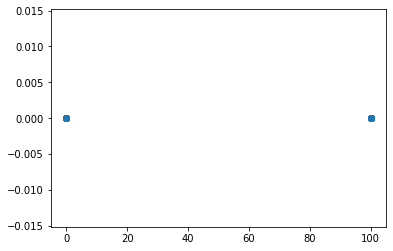

In [39]:
#Visualize the Test set results:
plt.scatter(y_test,y_pred)

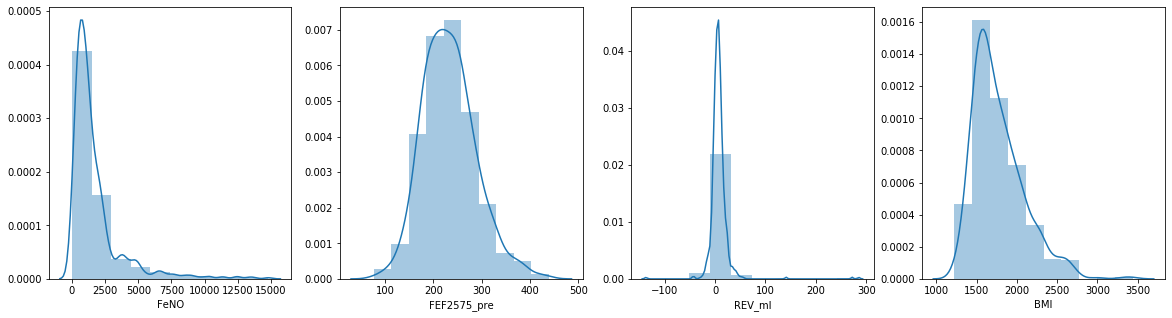

In [40]:
f, ax = plt.subplots(1, 4, figsize=(20,5))
vis1 = sns.distplot(sns_LDA_Asthma["FeNO"],bins=10, ax= ax[0])
vis2 = sns.distplot(sns_LDA_Asthma["FEF2575_pre"],bins=10, ax=ax[1])
vis3 = sns.distplot(sns_LDA_Asthma["REV_ml"],bins=10, ax= ax[2])
vis4 = sns.distplot(sns_LDA_Asthma["BMI"],bins=10, ax=ax[3])
f.savefig('subplot.png')

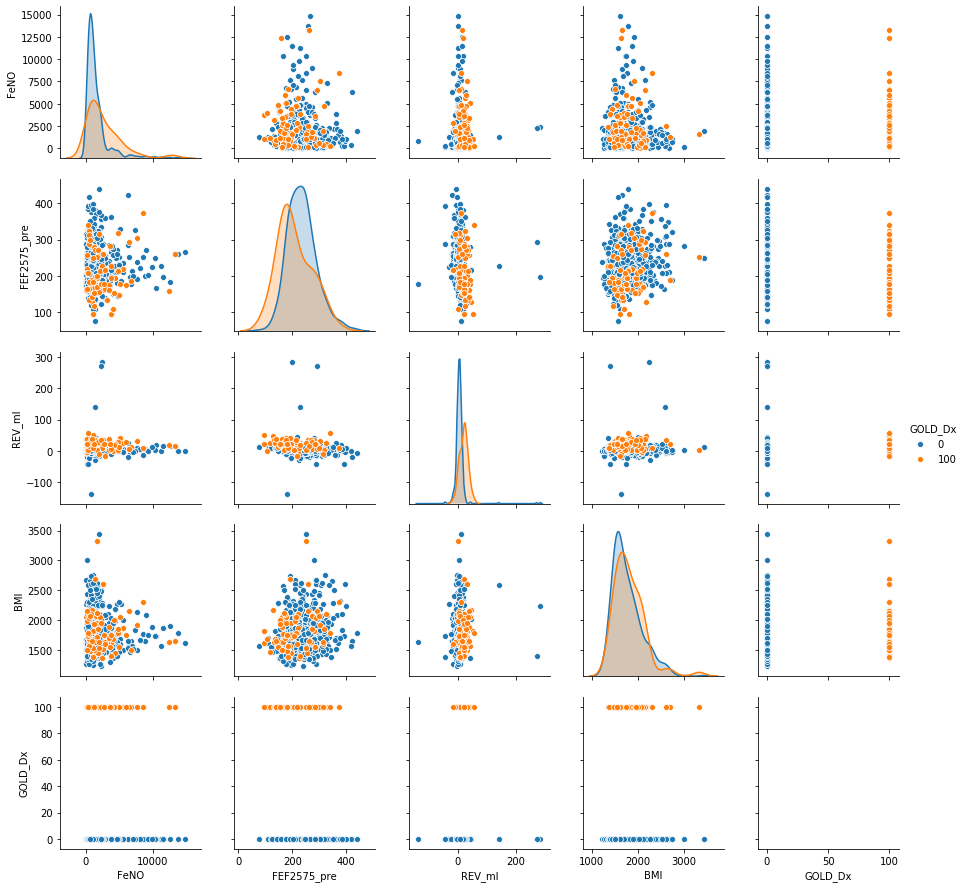

In [41]:
sns.pairplot(sns_LDA_Asthma, hue="GOLD_Dx")

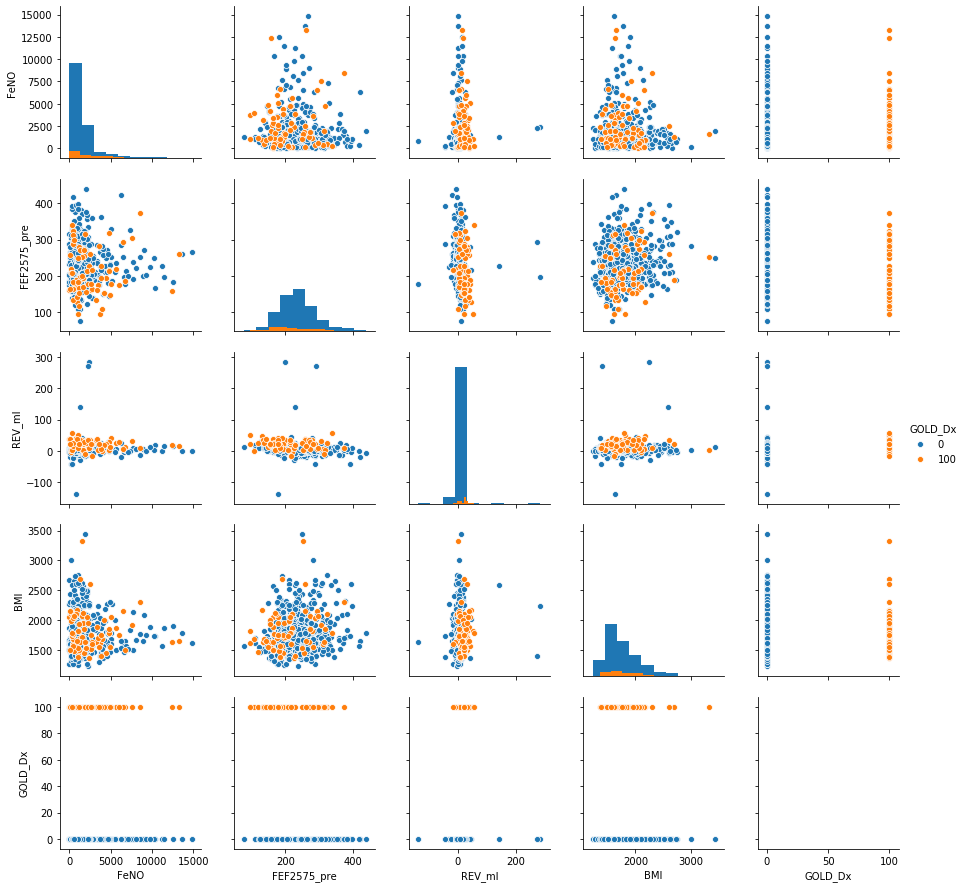

In [42]:
sns.pairplot(sns_LDA_Asthma, hue="GOLD_Dx", diag_kind="hist")

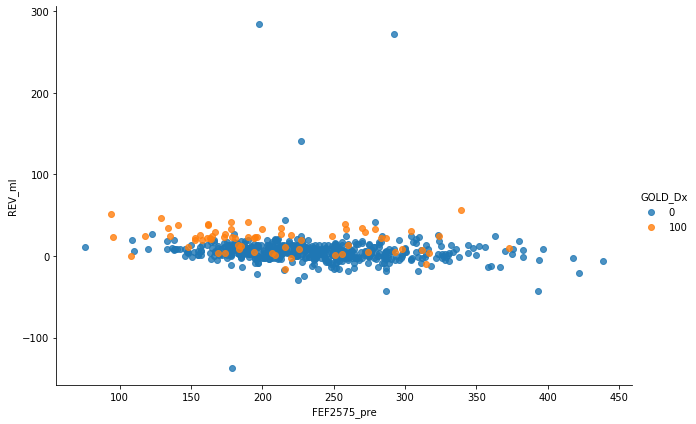

In [43]:
vis = sns.lmplot(data = sns_LDA_Asthma[["FEF2575_pre","GOLD_Dx","REV_ml"]], x = "FEF2575_pre", y = "REV_ml",fit_reg=False, hue = "GOLD_Dx",\
                 size = 6, aspect=1.5 )
vis.savefig("lda.png")

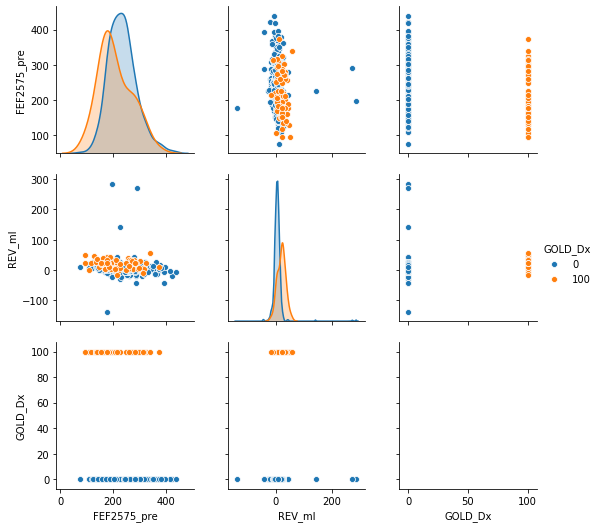

In [44]:
sns.pairplot(sns_LDA_Asthma[["FEF2575_pre","REV_ml","GOLD_Dx"]], hue="GOLD_Dx")

In [45]:
#Trying to create LDA graphic:
class_feature_means = pd.DataFrame(columns=sns_LDA_Asthma.GOLD_Dx)
for c, rows in sns_LDA_Asthma.groupby('GOLD_Dx'):
    class_feature_means[c] = rows.mean()
class_feature_means

GOLD_Dx              0            100          0            0            0    \
FeNO         1616.952555  2679.275362  1616.952555  1616.952555  1616.952555   
FEF2575_pre   235.609489   209.028986   235.609489   235.609489   235.609489   
REV_ml          5.881387    20.652174     5.881387     5.881387     5.881387   
BMI          1767.106024  1812.370741  1767.106024  1767.106024  1767.106024   
GOLD_Dx         0.000000   100.000000     0.000000     0.000000     0.000000   

GOLD_Dx              0            0            100          100          0    \
FeNO         1616.952555  1616.952555  2679.275362  2679.275362  1616.952555   
FEF2575_pre   235.609489   235.609489   209.028986   209.028986   235.609489   
REV_ml          5.881387     5.881387    20.652174    20.652174     5.881387   
BMI          1767.106024  1767.106024  1812.370741  1812.370741  1767.106024   
GOLD_Dx         0.000000     0.000000   100.000000   100.000000     0.000000   

GOLD_Dx      ...          0            0            0            0    \
FeNO         ...  1616.952555  1616.952555  1616.952555  1616.952555   
FEF2575_pre  ...   235.609489   235.609489   235.609489   235.609489   
REV_ml       ...     5.881387     5.881387     5.881387     5.881387   
BMI          ...  1767.106024  1767.106024  1767.106024  1767.106024   
GOLD_Dx      ...     0.000000     0.000000     0.000000     0.000000   

GOLD_Dx              0            0            0            0            0    \
FeNO         1616.952555  1616.952555  1616.952555  1616.952555  1616.952555   
FEF2575_pre   235.609489   235.609489   235.609489   235.609489   235.609489   
REV_ml          5.881387     5.881387     5.881387     5.881387     5.881387   
BMI          1767.106024  1767.106024  1767.106024  1767.106024  1767.106024   
GOLD_Dx         0.000000     0.000000     0.000000     0.000000     0.000000   

GOLD_Dx              0    
FeNO         1616.952555  
FEF2575_pre   235.609489  
REV_ml          5.881387  
BMI          1767.106024  
GOLD_Dx         0.000000  

[5 rows x 617 columns]

In [46]:
#Matrix calculations:
within_class_scatter_matrix = np.zeros((4,4))
for c, rows in sns_LDA_Asthma.groupby('GOLD_Dx'):
    rows = rows.drop(['GOLD_Dx'], axis=1)
    s = np.zeros((4,4))

for index, row in rows.iterrows():
        x, mc = row.values.reshape(4,1), class_feature_means[c].values.reshape(1,345)     
        s += (x - mc).dot((x - mc).T)    
        within_class_scatter_matrix += s

In [47]:
#Between Class Scatter Matrix:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(within_class_scatter_matrix))

In [48]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

In [49]:
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

In [50]:
for pair in pairs:
    print(pair[0])

1.0000000000000449
1.0000000000000022
0.9999999999999978
0.9999999999999725


In [51]:
eigen_value_sums = sum(eigen_values)

In [52]:
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.2500000000000101
Eigenvector 1: 0.24999999999999944
Eigenvector 2: 0.24999999999999833
Eigenvector 3: 0.249999999999992


In [53]:
w_matrix = np.hstack((pairs[0][1].reshape(4,1), pairs[1][1].reshape(4,1))).real

In [54]:
X_lda = np.array(X.dot(w_matrix))

In [55]:
#from sklearn.preprocessing import LabelEncoder
#y = LabelEncoder.fit_transform(sns_LDA_Asthma['GOLD_Dx'])

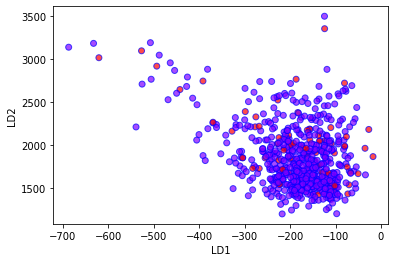

In [56]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)